In [24]:
from math import trunc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Process Data to get Combined File

In [25]:
# def drop_outliers(df):
#     col_interest = 'Victims Injured'
#     q1 = df[col_interest].quantile(0.25)
#     q3 = df[col_interest].quantile(0.75)
#     iqr = q3 - q1
#     outliers_removed = df[(df[col_interest] >= (q1 - 1.5 * iqr)) & (df[col_interest] <= (q3 + 1.5 * iqr))]
# def proccess_data():
#     data_path = 'Data/MergedGunData.csv'
#     df = pd.read_csv(data_path)
#     # Check for missing values
#     missing_values = df.isnull().sum()
#     print(missing_values)
#     # drop the cases with no address but no operations is fine since only 13 cases
#     df = df.dropna(subset=['Address'])
#     #handle data parsing
#     df['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
#     df.sort_values(by='dates_proccessed')
#     #Optional: write back proccessed data
#     df.to_csv('ProcessedGunData.csv',index=False)

# proccess_data()

In [26]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
data = pd.read_csv('ProcessedGunData.csv')

# Convert 'dates_proccessed' to datetime format and extract the year
data['Year'] = pd.to_datetime(data['dates_proccessed']).dt.year

# Aggregate totals for each year
yearly_victims_killed = data.groupby('Year')['Victims Killed'].sum().reset_index()
yearly_incidents = data.groupby('Year').size().reset_index(name='Incidents')

# Get values for 2018 and 2023
victims_killed_2018 = yearly_victims_killed.loc[yearly_victims_killed['Year'] == 2018, 'Victims Killed'].values[0]
victims_killed_2023 = yearly_victims_killed.loc[yearly_victims_killed['Year'] == 2023, 'Victims Killed'].values[0]
incidents_2018 = yearly_incidents.loc[yearly_incidents['Year'] == 2018, 'Incidents'].values[0]
incidents_2023 = yearly_incidents.loc[yearly_incidents['Year'] == 2023, 'Incidents'].values[0]

# Calculate percentage increases
percent_increase_victims = ((victims_killed_2023 - victims_killed_2018) / victims_killed_2018) * 100
percent_increase_incidents = ((incidents_2023 - incidents_2018) / incidents_2018) * 100

# Plot total victims killed per year
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=yearly_victims_killed['Year'], 
    y=yearly_victims_killed['Victims Killed'],
    mode='lines+markers+text',
    text=yearly_victims_killed['Victims Killed'],
    textposition='top center',
    textfont=dict(size=10),
    line=dict(width=3, color='#FF6B6B'),
    marker=dict(size=10, color='#FF6B6B')
))
fig1.add_shape(
    type="line",
    x0=2018, y0=victims_killed_2018,
    x1=2023, y1=victims_killed_2018,
    line=dict(color="Gray", width=2, dash="dot")
)
fig1.add_annotation(
    x=2023, y=(victims_killed_2023 - 20) / 1,
    text=f'+{percent_increase_victims:.2f}% from 2018',
    showarrow=True,
    arrowhead=2,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor='#333333',
    ax=0,
    ay=(victims_killed_2023 - victims_killed_2018) / 2,
    valign='middle'
)
fig1.update_layout(
    title='Total Mass-Shooting Deaths [2014-2023]',
    xaxis_title='Year',
    yaxis_title='Number of Victims Killed',
    font=dict(size=14),
    plot_bgcolor='rgba(240,240,240,0.8)',
    paper_bgcolor='white',
    hovermode='x unified',
    xaxis=dict(
        tickmode='linear',
        tick0=min(yearly_victims_killed['Year']),
        dtick=1,
        range=[min(yearly_victims_killed['Year'])-0.5, max(yearly_victims_killed['Year'])+0.5]
    )
)
fig1.show()

# Plot total incidents per year
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=yearly_incidents['Year'], 
    y=yearly_incidents['Incidents'],
    mode='lines+markers+text',
    text=yearly_incidents['Incidents'],
    textposition='top center',
    textfont=dict(size=10),
    line=dict(width=3, color='#4ECDC4'),
    marker=dict(size=10, color='#4ECDC4')
))
fig2.add_shape(
    type="line",
    x0=2018, y0=incidents_2018,
    x1=2023, y1=incidents_2018,
    line=dict(color="Gray", width=2, dash="dot")
)
fig2.add_annotation(
    x=2023, y=(incidents_2023 - 20) / 1,
    text=f'+{percent_increase_incidents:.2f}% from 2018',
    showarrow=True,
    arrowhead=2,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor='#333333',
    ax=0,
    ay=(incidents_2023 - incidents_2018) / 2,
)
fig2.update_layout(
    title='Total Mass-Shooting Incidents [2014-2023]',
    xaxis_title='Year',
    yaxis_title='Number of Incidents',
    font=dict(size=14),
    plot_bgcolor='rgba(240,240,240,0.8)',
    paper_bgcolor='white',
    hovermode='x unified',
    xaxis=dict(
        tickmode='linear',
        tick0=min(yearly_incidents['Year']),
        dtick=1,
        range=[min(yearly_incidents['Year'])-0.5, max(yearly_incidents['Year'])+0.5]
   )
)
fig2.show()

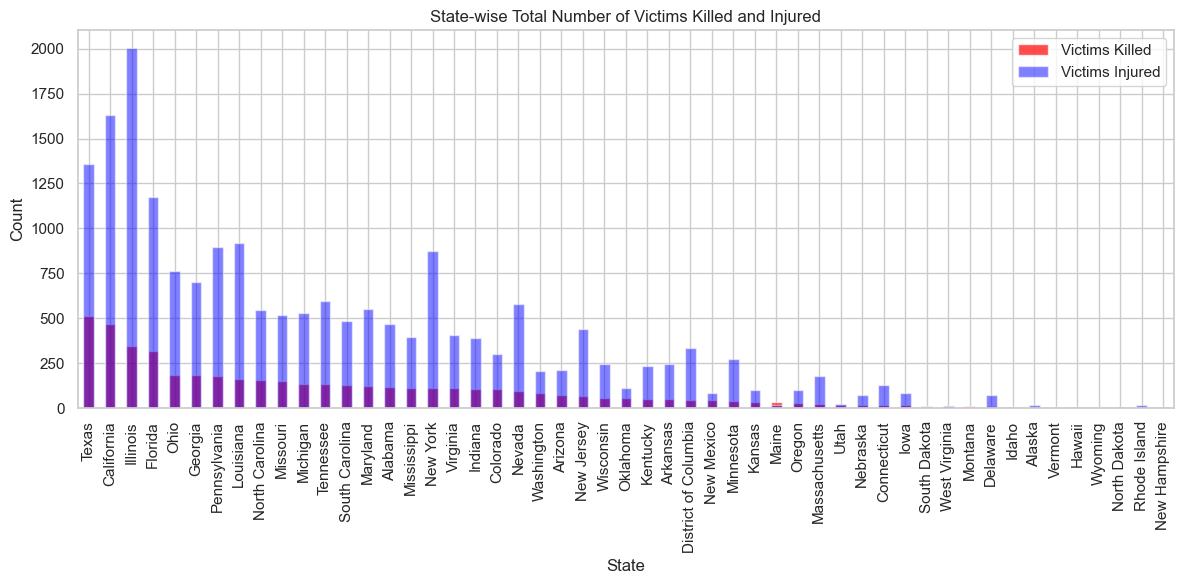

In [27]:
''' 
State-wise distribution of victims killed and injured
'''

file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Group by state and calculate the total number of victims killed and injured
state_totals = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'})

# Sort by the total number of victims killed for better visualization
state_totals = state_totals.sort_values(by='Victims Killed', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
state_totals['Victims Killed'].plot(kind='bar', color='red', alpha=0.7, label='Victims Killed')
state_totals['Victims Injured'].plot(kind='bar', color='blue', alpha=0.5, label='Victims Injured')

plt.title('State-wise Total Number of Victims Killed and Injured')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Convert full state names to abbreviations
df['State'] = df['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Killed',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Victims Killed': 'Victims Killed'},
    title='Number of Victims Killed by State'
)

# Create choropleth map for victims injured
fig_injured = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Injured',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'Victims Injured': 'Victims Injured'},
    title='Number of Victims Injured by State'
)

# Show the maps
fig_killed.show()
fig_injured.show()

# Fatality Index

In [52]:


# Assuming `gun_data` DataFrame is already loaded and `fatality_index` DataFrame is created.

# Calculate the new fatality index
gun_data['Victims Killed'] = pd.to_numeric(gun_data['Victims Killed'], errors='coerce')
fatality_index = gun_data.groupby('State').agg(
    total_incidents=('Incident ID', 'count'),
    total_victims_killed=('Victims Killed', 'sum')
)
fatality_index['fatality_index'] = (fatality_index['total_victims_killed'] ** 2) / fatality_index['total_incidents']
# fatality_index['fatality_index'] = (
#     fatality_index['total_victims_killed'] * 
#     np.log(fatality_index['total_victims_killed'] + 1) * np.log(fatality_index['total_incidents'] + 1) / 
#     np.sqrt(fatality_index['total_incidents'])
# )

# Normalize the fatality index
fatality_index['normalized_fatality_index'] = (
    fatality_index['fatality_index'] / fatality_index['fatality_index'].sum()
)
fatality_index = fatality_index.reset_index()


In [55]:
# Map state full names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

fatality_index['State Abbreviation'] = fatality_index['State'].map(state_abbreviations)

# Create a choropleth map
fig = px.choropleth(fatality_index,
                    locations='State Abbreviation',
                    locationmode='USA-states',
                    color='normalized_fatality_index',
                    scope='usa',
                    title='Fatality Index by State in US',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(fitbounds='locations', visible=False)
# fig.show()

# Update layout for better fitting
fig.update_layout(
    title_text='Normalised Fatality Index by State in US',
    title_x=0.5,  # Center the title
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        bgcolor='rgba(0,0,0,0)'
    ),
    margin=dict(l=0, r=0, t=50, b=0),  # Reduce whitespace
    coloraxis_colorbar=dict(title="Fatality Index", x=1)
)

fig.show()

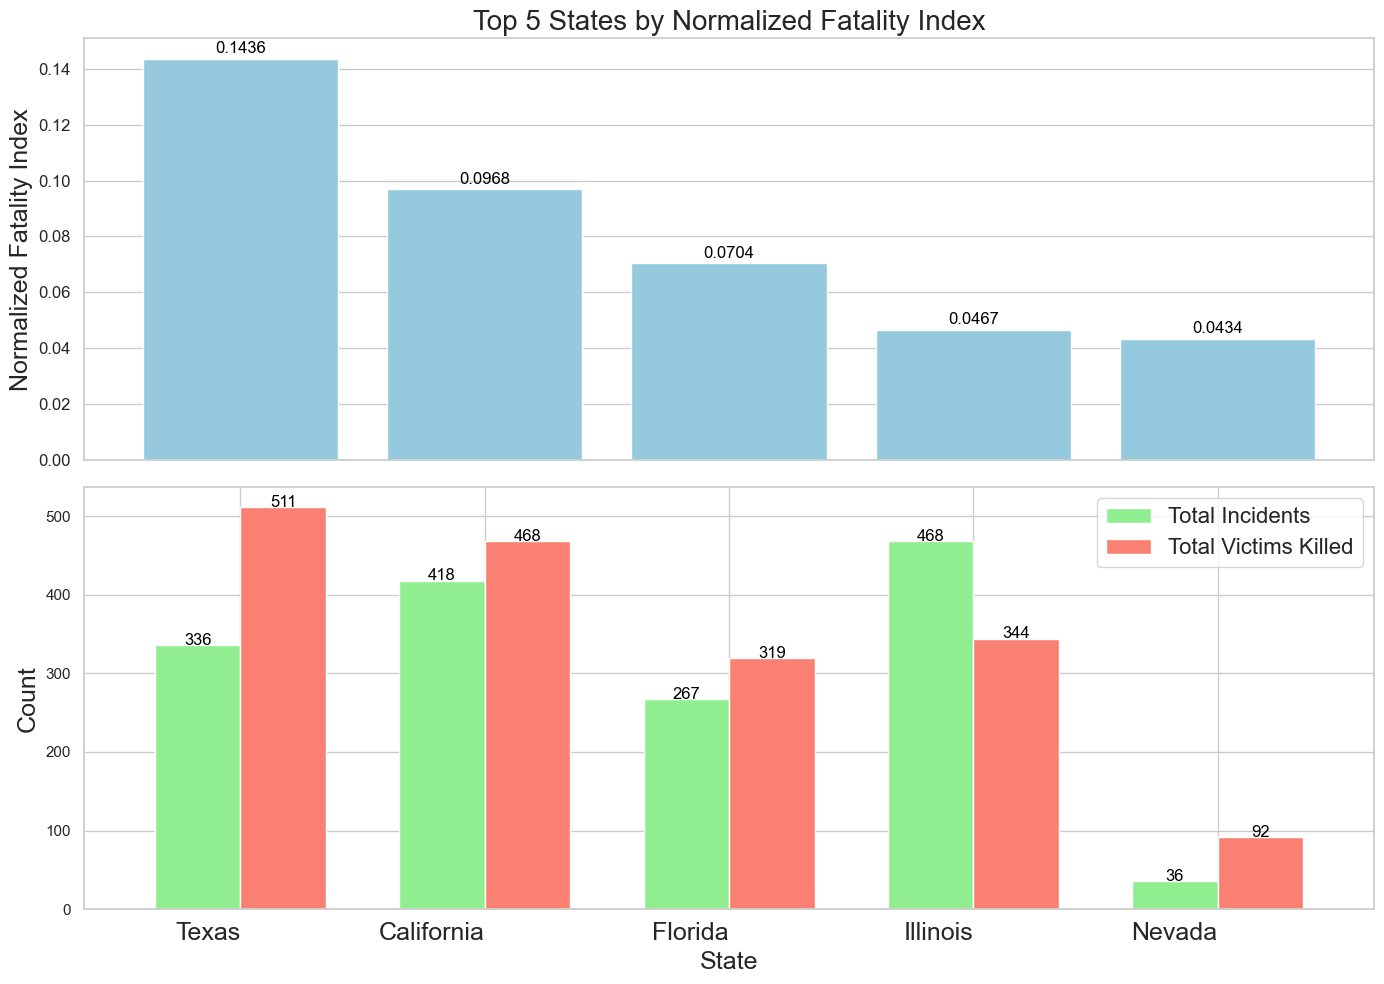

In [54]:

# Sort by normalized fatality index and get top 5 states
top_5_states = fatality_index.sort_values('normalized_fatality_index', ascending=False).head(5)

# Plotting
sns.set(style='whitegrid', palette='muted')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot normalized fatality index
sns.barplot(x='State', y='normalized_fatality_index', data=top_5_states, ax=ax1, color='skyblue')
ax1.set_title('Top 5 States by Normalized Fatality Index', fontsize=20)
ax1.set_ylabel('Normalized Fatality Index', fontsize=18)
ax1.tick_params(axis='y', labelsize=12)

# Add data labels for normalized fatality index
for i, v in enumerate(top_5_states['normalized_fatality_index']):
    ax1.text(i, v + 0.002, f'{v:.4f}', color='black', ha='center')

# Plot total incidents and total victims killed
width = 0.35
x = range(len(top_5_states))
ax2.bar([i - width/2 for i in x], top_5_states['total_incidents'], width, label='Total Incidents', color='lightgreen')
ax2.bar([i + width/2 for i in x], top_5_states['total_victims_killed'], width, label='Total Victims Killed', color='salmon')
ax2.set_xlabel('State', fontsize=18)
ax2.set_ylabel('Count', fontsize=18)
ax2.legend(loc='upper right', fontsize=16)

# Add data labels for total incidents and victims killed
for i in range(len(x)):
    ax2.text(i - width/2, top_5_states.iloc[i]['total_incidents'] + 0.5,
             str(top_5_states.iloc[i]['total_incidents']), color='black', ha='center')
    ax2.text(i + width/2, top_5_states.iloc[i]['total_victims_killed'] + 0.5,
             str(top_5_states.iloc[i]['total_victims_killed']), color='black', ha='center')

# Rotate x-axis labels for better readability
plt.xticks(x, top_5_states['State'], rotation=0, ha='right', fontsize=18)

plt.tight_layout()
plt.show()